In [38]:
%pip install gensim klib nltk scikit-learn spacy imblearn tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Standard libraries
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Related third-party imports
from gensim.models import Word2Vec
import klib
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier


In [37]:
import concurrent.futures

In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

  You can safely remove it manually.


  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/300.9 MB 6.5 MB/s eta 0:00:46
   ---------------------------------------- 0.9/300.9 MB 4.2 MB/s eta 0:01:11
   ---------------------------------------- 1.4/300.9 MB 5.1 MB/s eta 0:00:59
   ---------------------------------------- 1.8/300.9 MB 5.6 MB/s eta 0:00:53
   ---------------------------------------- 2.2/300.9 MB 6.0 MB/s eta 0:00:51
   ---------------------------------------- 2.4/300.9 MB 6.0 MB/s eta 0:00:50
   ---------------------------------------- 3.0/300.9 MB 6.5 MB/s eta 0:00:47
   ---------------------------------------- 3.2/300.9 MB 6.5 MB/s eta 0:00:46
   ---------------------------------------- 3.6/300.9 MB 6.8 MB/s eta 0:00:44
    --------------------------------------- 4.2/300.9 MB 7.1 MB/s eta 0:00:42
    --------------------------------------- 4.6/300.9 MB 7.2 MB/s eta 0:00:42
    ----

In [12]:
zip_file_path = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'

In [16]:
df = pd.read_csv(zip_file_path)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1176\2561993390.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zip_file_path)


In [27]:
df.head(8)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76449,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444271
1,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76543,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444281
2,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90247,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444295
3,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Difficulty submitting a dispute or getting inf...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90222,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8444316
4,2024-02-12,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,NY,11580,NaN,NaN,Web,2024-02-12,In progress,Yes,NaN,8327489
5,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Fidelity National Information Services, Inc. (...",FL,32828,NaN,NaN,Web,2024-02-28,In progress,Yes,NaN,8434635
6,2024-02-28,Checking or savings account,Checking account,Opening an account,Unable to open an account,NaN,NaN,"Fidelity National Information Services, Inc. (...",NY,11365,NaN,NaN,Web,2024-02-28,In progress,Yes,NaN,8434349
7,2024-02-11,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,NaN,MOHELA,WA,98682,NaN,NaN,Web,2024-02-11,In progress,Yes,NaN,8326056


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790278 entries, 0 to 4790277
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 657.

In [28]:
df.isnull().sum()


Date received                         0
Product                               0
Sub-product                      235290
Issue                                 0
Sub-issue                        729071
Consumer complaint narrative    3081226
Company public response         2521602
Company                               0
State                             44561
ZIP code                          30224
Tags                            4325029
Consumer consent provided?       972063
Submitted via                         0
Date sent to company                  0
Company response to consumer          9
Timely response?                      0
Consumer disputed?              4021962
Complaint ID                          0
dtype: int64

In [35]:
# To drop the duplicate rows, dropping missing data, reducing memory usage.
df = klib.data_cleaning(df)

Shape of cleaned data: (4790278, 17) - Remaining NAs: 11636008


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 0 single valued.     Columns: []
Dropped missing values: 4325029
Reduced memory by at least: 496.04 MB (-75.4%)



In [40]:
# to clean the column names like converting it into lowercase
df = klib.clean_column_names(df)

In [41]:
# Converting the datatypes into appropriate datatypes
df = klib.convert_datatypes(df)

In [42]:
# Dropping Rows which have missing values in all columns
df = klib.drop_missing(df)

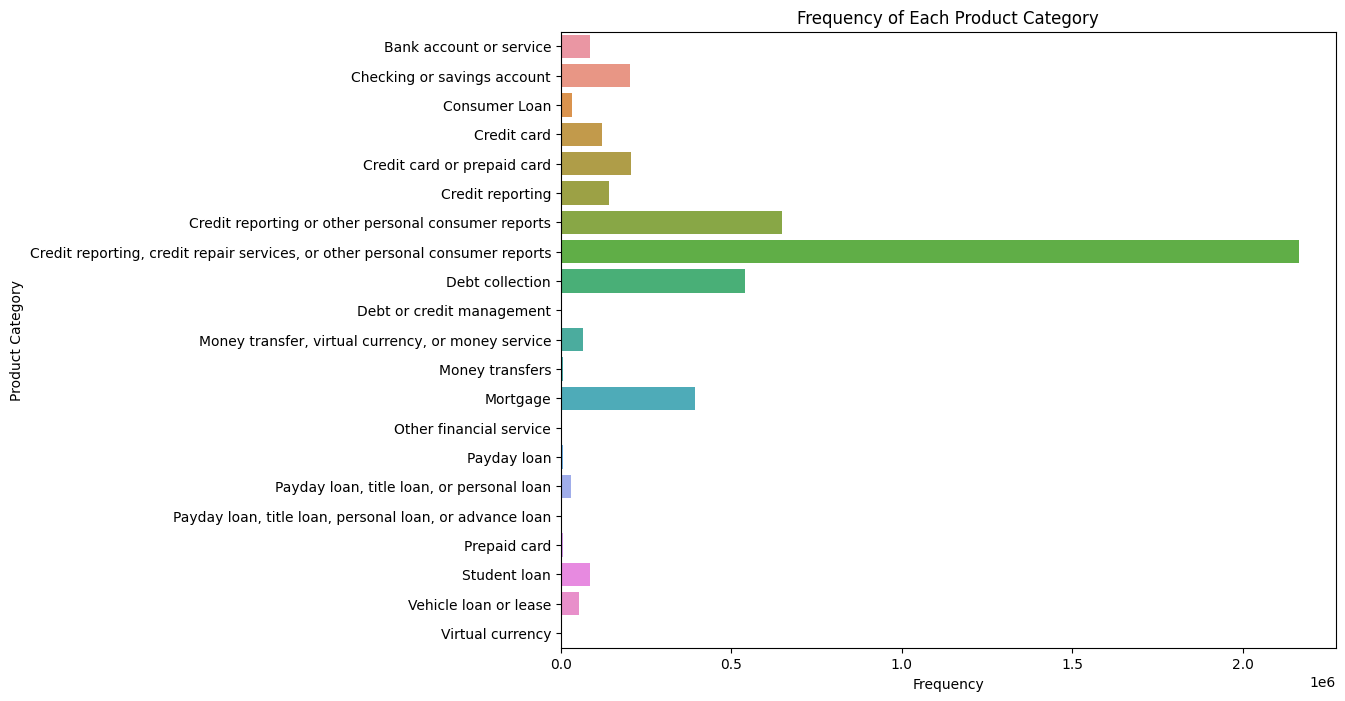

In [49]:
product_counts = df['product'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=product_counts.values, y=product_counts.index, orient='h')
plt.title('Frequency of Each Product Category')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.show()

In [50]:
state_counts = df['state'].value_counts()

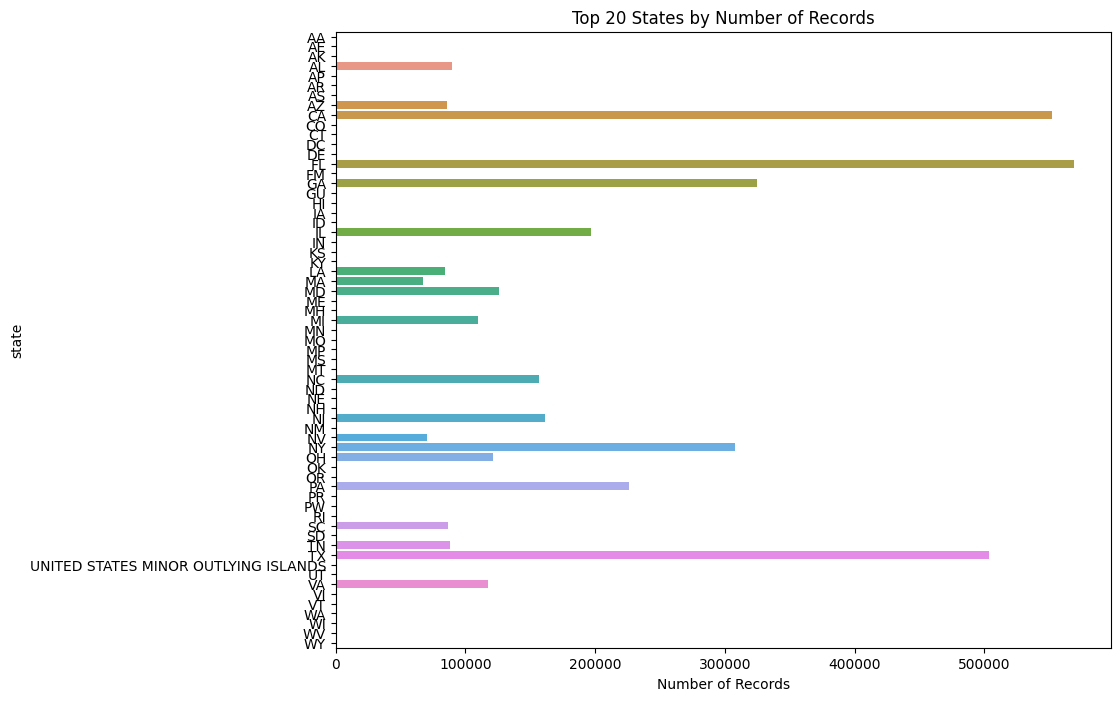

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(y=state_counts.index[:20], x=state_counts.values[:20], orient='h')
plt.title('Top 20 States by Number of Records')
plt.xlabel('Number of Records')
plt.ylabel('state')
plt.show()


Most complaint against Company

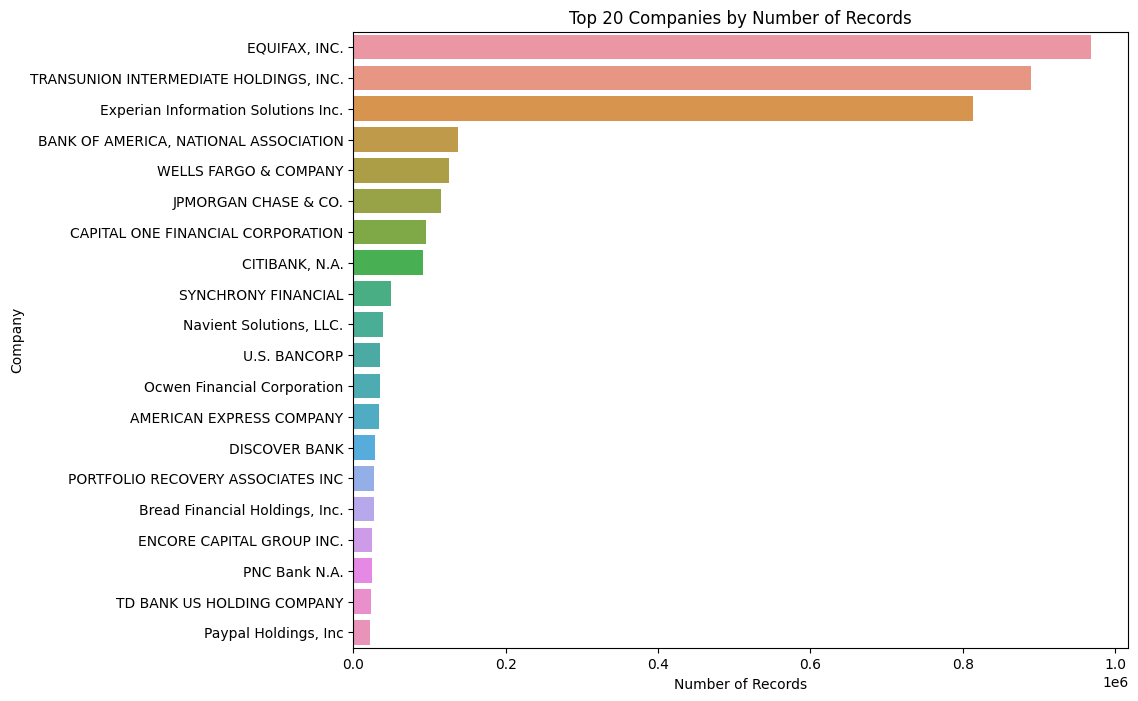

In [54]:
plt.figure(figsize=(10, 8)) # Adjust the size as needed
sns.countplot(y='company', data=df, order=df['company'].value_counts().index[:20])
plt.title('Top 20 Companies by Number of Records')
plt.xlabel('Number of Records')
plt.ylabel('Company')
plt.show()

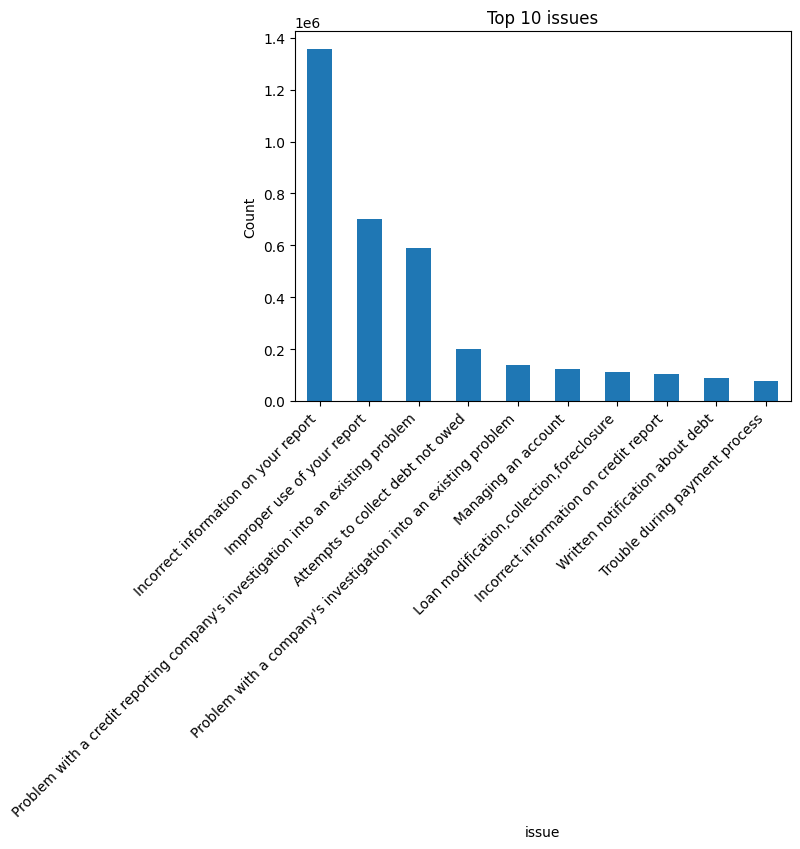

In [55]:
df['issue'].value_counts()
df['issue'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 issues')
plt.xlabel('issue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

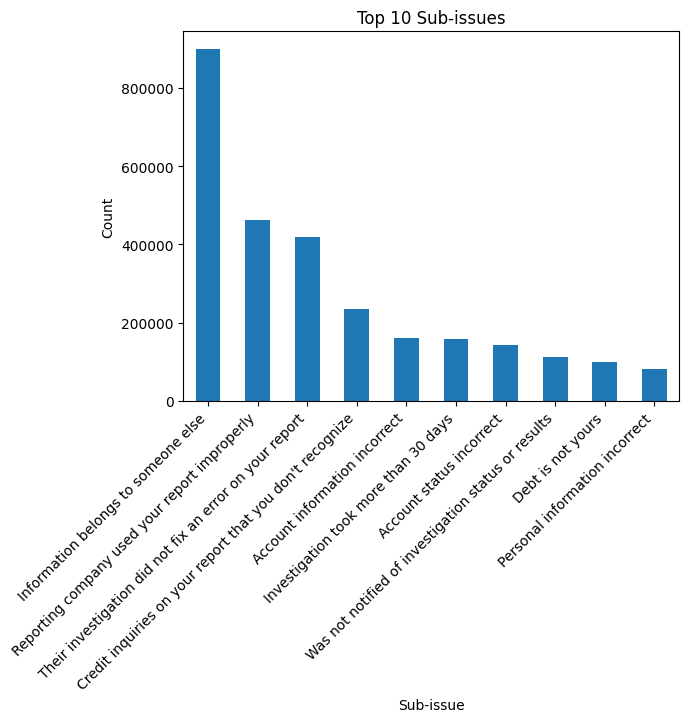

In [59]:
df['sub_issue'].value_counts()
df['sub_issue'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Sub-issues')
plt.xlabel('Sub-issue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

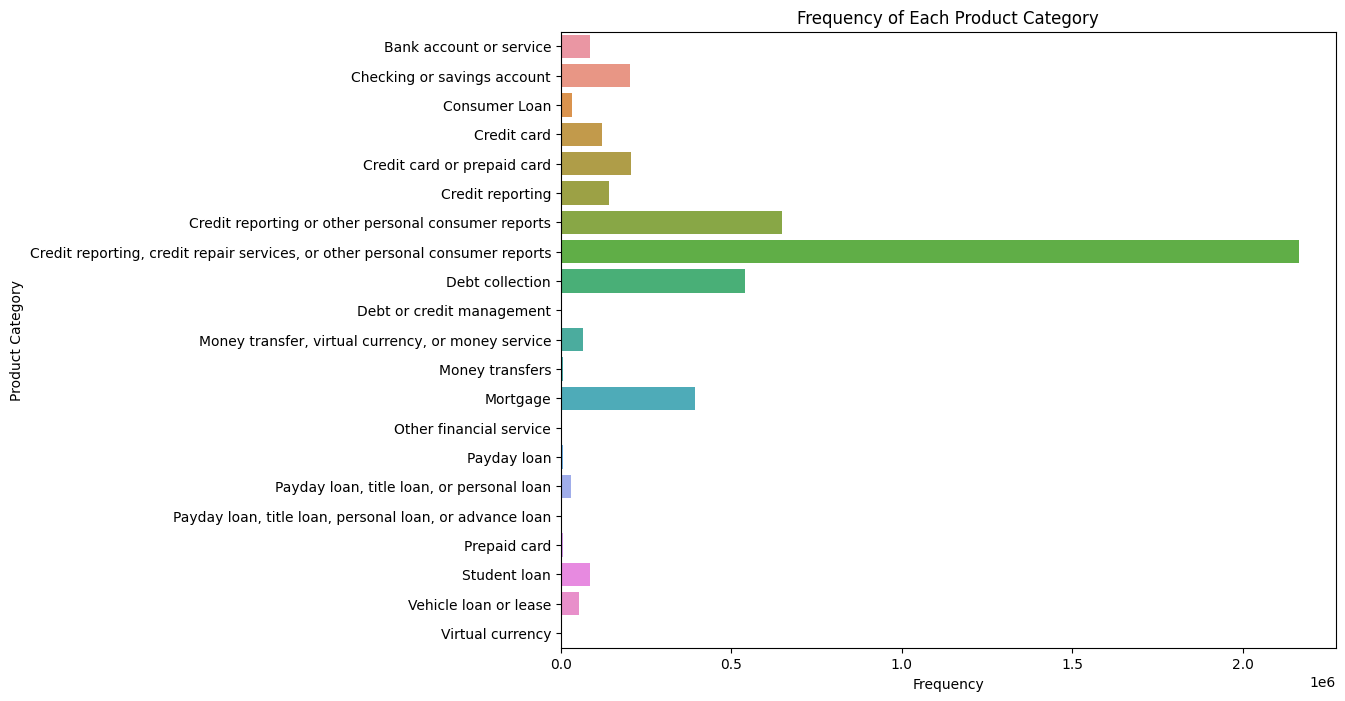

In [60]:
product_counts = df['product'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=product_counts.values, y=product_counts.index, orient='h')
plt.title('Frequency of Each Product Category')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.show()

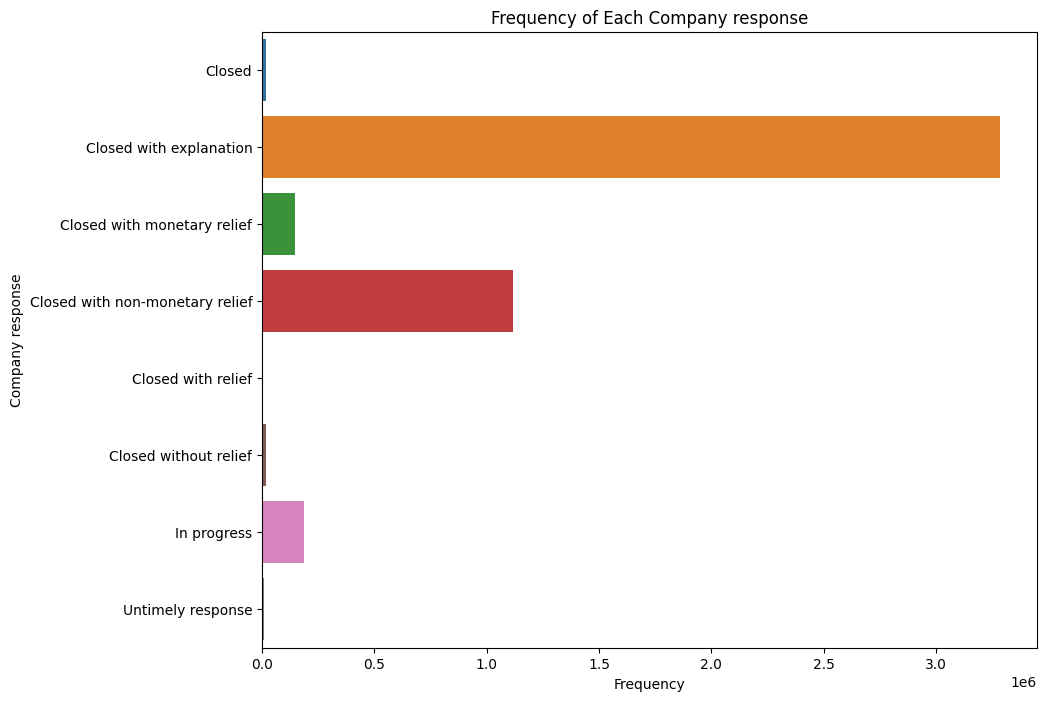

In [62]:
company_response = df['company_response_to_consumer'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=company_response.values, y=company_response.index, orient='h')
plt.title('Frequency of Each Company response')
plt.xlabel('Frequency')
plt.ylabel('Company response')
plt.show()

In [65]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'consumer_consent_provided', 'submitted_via',
       'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [67]:
df[df['consumer_disputed'] == 'Yes'].shape[0]
df.shape[0]-df['consumer_disputed'].isnull().sum()
# Count the number of null values in the column
null_count = df['consumer_disputed'].isnull().sum()
print(f"Number of null values in 'Consumer disputed': {null_count}")

Number of null values in 'Consumer disputed': 4021962


In [68]:
#Calculate the percentage of null values
total_rows = len(df)
null_percentage = (null_count / total_rows) * 100
print(f"Percentage of null values: {null_percentage:.2f}%")

Percentage of null values: 83.96%


In [70]:
columns_to_convert = [
    'date_received', 'product', 'sub_product', 'issue', 'sub_issue',
    'company_public_response', 'company', 'state', 'zip_code', 'tags',
    'consumer_consent_provided', 'submitted_via', 'date_sent_to_company',
    'company_response_to_consumer', 'timely_response'
]

# Convert specified columns to object, only if they exist in the DataFrame
for column in columns_to_convert:
    if column in df.columns:
        df[column] = df[column].astype('object')


In [72]:
# I want to drop all those rows which have null values in my target column
df.dropna(subset = ['consumer_disputed'], inplace=True)

In [73]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     235159
issue                                0
sub_issue                       455365
consumer_complaint_narrative    604305
company_public_response         572607
company                              0
state                             5650
zip_code                          3857
consumer_consent_provided       470515
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed                    0
complaint_id                         0
dtype: int64

In [74]:
df.shape

(768316, 17)

In [76]:
df.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
236389,2017-03-20,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,XXXX later to become Navient held both federal...,NaN,"Navient Solutions, LLC.",SD,57702,Consent provided,Web,2017-03-21,Closed with explanation,Yes,Yes,2394692
237525,2015-04-06,Credit reporting,NaN,Incorrect information on credit report,Personal information,<NA>,Company chooses not to provide a public response,Experian Information Solutions Inc.,MD,21215,Consent not provided,Web,2015-04-27,Closed with non-monetary relief,Yes,No,1316812
242525,2013-12-27,Mortgage,Other mortgage,Other,NaN,<NA>,NaN,Statebridge Company,MA,01608,NaN,Postal mail,2014-01-06,Closed with explanation,Yes,No,648070
250006,2014-08-27,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,<NA>,NaN,NATIONSTAR MORTGAGE LLC,FL,33130,NaN,Web,2014-09-02,Closed with explanation,Yes,No,1003365
255994,2012-07-31,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,<NA>,NaN,Ocwen Financial Corporation,CA,91739,NaN,Referral,2012-08-07,Closed with explanation,Yes,Yes,126457


In [77]:
clean_df = df.drop(columns=['consumer_consent_provided','complaint_id', 'date_sent_to_company',
                              'zip_code','state','date_received','sub_product','consumer_complaint_narrative',
                              'sub_issue'])
clean_df.dropna(inplace = True)

In [78]:
clean_df.isnull().sum()

product                         0
issue                           0
company_public_response         0
company                         0
submitted_via                   0
company_response_to_consumer    0
timely_response                 0
consumer_disputed               0
dtype: int64

In [79]:
clean_df.shape

(195709, 8)

In [80]:
clean_df = clean_df.reset_index(drop=True)

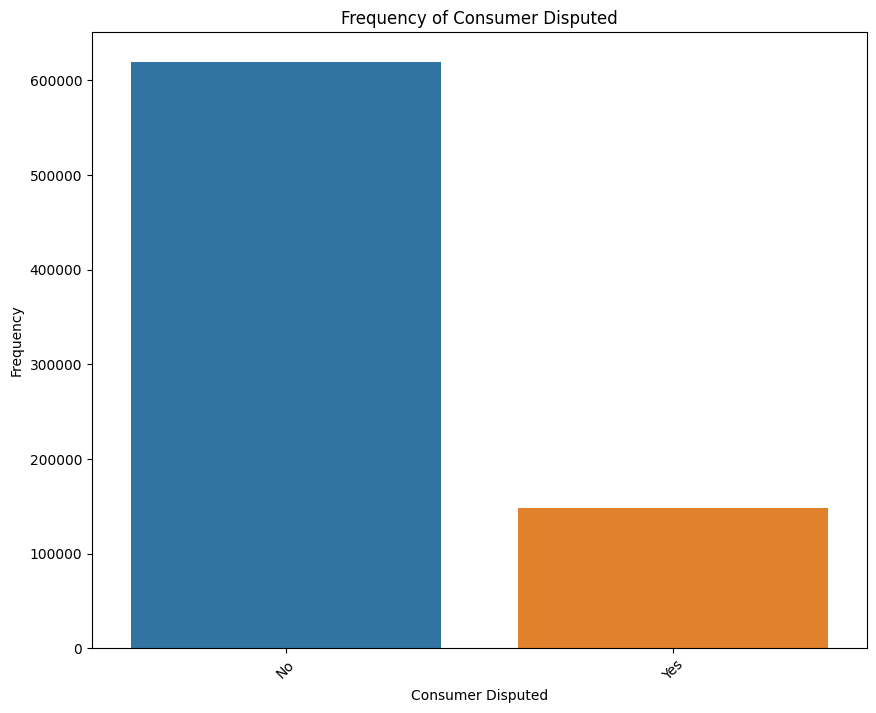

In [82]:
plt.figure(figsize=(10, 8))
# Assuming consumer_disputed is a Series with indices as categories and values as counts
sns.barplot(x=consumer_disputed.index, y=consumer_disputed.values)
plt.title('Frequency of Consumer Disputed')
plt.ylabel('Frequency')  # Correcting label for clarity
plt.xlabel('Consumer Disputed')  # Adjusting label for clarity
plt.xticks(rotation=45)  # Optional: Rotate labels if they overlap
plt.show()

To tackle the imbalance observed in our dataframe, consider personalizing our approach with the following tailored solutions:

- Deploying the Synthetic Minority Over-sampling Technique (SMOTE), which creatively amplifies the minority class to balance our dataset.
- Opting for a Random Over Sampler approach, directly boosting the representation of our less prevalent class.
- Harnessing the power of sophisticated algorithms like Random Forests or Support Vector Machines, renowned for their adept handling of imbalanced datasets.
- Adopting Stratified Sampling, a technique ensuring that each class is proportionately represented, mirroring the original distribution.
- Exploring Ensemble Methods, including the nuanced strategies of Bagging and Boosting, to refine our model's performance substantially.
- Fine-tuning class weights, a strategic move to harshly penalize misclassifications of our minority class, thereby encouraging a more balanced predictive outcome.

In [86]:
columns_to_display = [
    'product',
    'timely_response',
    # 'tags', # Supposez que cette colonne pourrait ne pas exister
    'company_response_to_consumer',
    'submitted_via',
    'consumer_disputed',
    'company_public_response'
]

for column in columns_to_display:
    print(f"{column.upper()}:")
    # Vérifier si la colonne existe dans le DataFrame
    if column in clean_df.columns:
        for value in clean_df[column].unique():
            print(value)
    else:
        print(f"La colonne '{column}' n'existe pas dans le DataFrame.")
    print('```````````````````````````````````````````````````````\n')


PRODUCT:
Credit reporting
Mortgage
Debt collection
Payday loan
Consumer Loan
Credit card
Bank account or service
Prepaid card
Other financial service
Student loan
Money transfers
Checking or savings account
Virtual currency
```````````````````````````````````````````````````````

TIMELY_RESPONSE:
Yes
No
```````````````````````````````````````````````````````

COMPANY_RESPONSE_TO_CONSUMER:
Closed with non-monetary relief
Closed with explanation
Closed with monetary relief
Closed
```````````````````````````````````````````````````````

SUBMITTED_VIA:
Web
Referral
Fax
Phone
Postal mail
Email
```````````````````````````````````````````````````````

CONSUMER_DISPUTED:
No
Yes
```````````````````````````````````````````````````````

COMPANY_PUBLIC_RESPONSE:
Company chooses not to provide a public response
Company believes it acted appropriately as authorized by contract or law
Company has responded to the consumer and the CFPB and chooses not to provide a public response
Company believes comp

Executing a comprehensive suite of Natural Language Processing (NLP) preprocessing steps:

Eliminating punctuation marks
Segmenting text into tokens
Converting text to lowercase
Filtering out stop words
Applying lemmatization to reduce words to their base or dictionary form

In [91]:
df = pd.DataFrame.copy(clean_df)

In [92]:
stemmer = PorterStemmer()

def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def parallel_preprocess(column):
    df[column] = df[column].apply(preprocess_text)

columns_to_preprocess = ['product', 'issue', 'company_public_response', 'company', 'tags', 'submitted_via', 'company_response_to_consumer', 'timely_response']
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(parallel_preprocess, columns_to_preprocess)

In [93]:
df['consumer_disputed'] = df['consumer_disputed'].apply(lambda x: 1 if x == 'Yes' else 0)

In [94]:
df.head(3)

,product,issue,company_public_response,company,submitted_via,company_response_to_consumer,timely_response,consumer_disputed
0,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,Experian Information Solutions Inc.,Web,Closed with non-monetary relief,Yes,0
1,Mortgage,"Loan servicing, payments, escrow account",Company chooses not to provide a public response,WELLS FARGO & COMPANY,Web,Closed with explanation,Yes,1
2,Mortgage,Settlement process and costs,Company believes it acted appropriately as aut...,"BROKER SOLUTIONS, INC.",Web,Closed with explanation,Yes,0


In [97]:
nltk.download('punkt')
df['combined_text'] = df['product'].astype(str) + ' ' + df['issue'].astype(str) + ' ' + \
                      df['company_public_response'].astype(str) + ' ' + df['company'].astype(str) + ' ' + \
                      df['submitted_via'].astype(str) + ' ' + df['company_response_to_consumer'].astype(str) + ' ' + \
                      df['timely_response'].astype(str)

# Tokenize the combined text
df['tokenized_text'] = df['combined_text'].apply(word_tokenize)
df[['combined_text', 'tokenized_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,combined_text,tokenized_text
0,Credit reporting Incorrect information on cred...,"[Credit, reporting, Incorrect, information, on..."
1,"Mortgage Loan servicing, payments, escrow acco...","[Mortgage, Loan, servicing, ,, payments, ,, es..."
2,Mortgage Settlement process and costs Company ...,"[Mortgage, Settlement, process, and, costs, Co..."
3,Debt collection Taking/threatening an illegal ...,"[Debt, collection, Taking/threatening, an, ill..."
4,Payday loan Can't contact lender Company has r...,"[Payday, loan, Ca, n't, contact, lender, Compa..."


In [105]:
# Define a preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization
    tokens = word_tokenize(text)
    # Lower casing
    tokens = [word.lower() for word in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [106]:
# Apply text preprocessing to a column (example: 'consumer_complaint_narrative')
if 'consumer_complaint_narrative' in df.columns:
    df['preprocessed_text'] = df['consumer_complaint_narrative'].astype(str).apply(preprocess_text)

In [107]:
# Example of combining relevant columns for NLP tasks
columns_to_combine = ['product', 'issue', 'company_public_response', 'company']
df['combined_text'] = df[columns_to_combine].apply(lambda x: ' '.join(x.astype(str)), axis=1)
df['combined_text'] = df['combined_text'].apply(preprocess_text)

In [109]:
# Tokenize the combined text for further processing or modeling
df['tokenized_text'] = df['combined_text'].apply(word_tokenize)

In [110]:
df.head()

,product,issue,company_public_response,company,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,combined_text,tokenized_text,document_embeddings
0,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,Experian Information Solutions Inc.,Web,Closed with non-monetary relief,Yes,0,credit reporting incorrect information credit ...,"[credit, reporting, incorrect, information, cr...","[0.23804124, 1.7674768, -1.4240992, -0.5854379..."
1,Mortgage,"Loan servicing, payments, escrow account",Company chooses not to provide a public response,WELLS FARGO & COMPANY,Web,Closed with explanation,Yes,1,mortgage loan servicing payment escrow account...,"[mortgage, loan, servicing, payment, escrow, a...","[-0.084915124, 0.8170447, -0.8316276, -0.07033..."
2,Mortgage,Settlement process and costs,Company believes it acted appropriately as aut...,"BROKER SOLUTIONS, INC.",Web,Closed with explanation,Yes,0,mortgage settlement process cost company belie...,"[mortgage, settlement, process, cost, company,...","[-1.0326985, -0.6520475, 1.3516415, 0.48073894..."
3,Debt collection,Taking/threatening an illegal action,Company believes it acted appropriately as aut...,"Kramer & Frank, P.C.",Web,Closed with non-monetary relief,Yes,0,debt collection takingthreatening illegal acti...,"[debt, collection, takingthreatening, illegal,...","[-0.6547367, -0.7943436, 1.3758979, 0.6344974,..."
4,Payday loan,Can't contact lender,Company has responded to the consumer and the ...,Cottonwood Financial Ltd.,Web,Closed with explanation,Yes,0,payday loan cant contact lender company respon...,"[payday, loan, cant, contact, lender, company,...","[0.119731285, 1.0852226, -1.0148492, -0.501406..."


In [111]:
tokenized_texts = df['tokenized_text'].tolist()
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, sg=1)

# Save the trained Word2Vec model
w2v_model.save("word2vec_model.bin")

In [112]:
# Example of generating document embeddings
def document_embeddings(text, model):
    words = [word for word in text if word in model.wv]
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)


In [113]:
df['document_embeddings'] = df['tokenized_text'].apply(lambda x: document_embeddings(x, w2v_model))


In [114]:
df.head()

,product,issue,company_public_response,company,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,combined_text,tokenized_text,document_embeddings
0,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,Experian Information Solutions Inc.,Web,Closed with non-monetary relief,Yes,0,credit reporting incorrect information credit ...,"[credit, reporting, incorrect, information, cr...","[0.04043559, -0.439174, -0.122150876, -0.00944..."
1,Mortgage,"Loan servicing, payments, escrow account",Company chooses not to provide a public response,WELLS FARGO & COMPANY,Web,Closed with explanation,Yes,1,mortgage loan servicing payment escrow account...,"[mortgage, loan, servicing, payment, escrow, a...","[0.1615506, -0.340059, -0.13248809, -0.0486560..."
2,Mortgage,Settlement process and costs,Company believes it acted appropriately as aut...,"BROKER SOLUTIONS, INC.",Web,Closed with explanation,Yes,0,mortgage settlement process cost company belie...,"[mortgage, settlement, process, cost, company,...","[-0.047895648, -0.19152927, -0.19129828, -0.37..."
3,Debt collection,Taking/threatening an illegal action,Company believes it acted appropriately as aut...,"Kramer & Frank, P.C.",Web,Closed with non-monetary relief,Yes,0,debt collection takingthreatening illegal acti...,"[debt, collection, takingthreatening, illegal,...","[-0.10630809, 0.14763771, 0.045625594, -0.2057..."
4,Payday loan,Can't contact lender,Company has responded to the consumer and the ...,Cottonwood Financial Ltd.,Web,Closed with explanation,Yes,0,payday loan cant contact lender company respon...,"[payday, loan, cant, contact, lender, company,...","[-0.024665564, -0.07092343, -0.12617823, -0.11..."


Modelling

In [119]:
# Séparation des caractéristiques et de la cible
X = df.drop(['consumer_disputed'], axis=1)
y = df['consumer_disputed']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Prétraitement pour les caractéristiques numériques
numeric_features = ['document_embeddings']  # Assurez-vous que c'est correctement formaté pour votre cas
numeric_transformer = StandardScaler()

# Prétraitement pour les caractéristiques catégorielles
categorical_features = ['product', 'issue', 'company_public_response', 'company', 'submitted_via', 'company_response_to_consumer', 'timely_response']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Prétraitement pour les données textuelles
text_features = 'combined_text'
text_transformer = TfidfVectorizer(stop_words='english', max_features=1000)

§§§§§§§§§

In [130]:
l = [len(i) for i in df['document_embeddings']]
print(sorted(l)[int(len(l)/2)])
print(len(df['document_embeddings'][0]))
print(len(df['document_embeddings']))

100
100
195709


In [143]:
X = df['document_embeddings']
y = df['consumer_disputed']
X = np.array(X)
y = np.array(y)

In [147]:
X.shape,y.shape

((195709,), (195709,))

In [151]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.reshape(-1, 1), y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [152]:
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())
X_train.shape, X_test.shape

((259524, 1, 100), (64882, 1, 100))

In [155]:
train_class_distribution = np.bincount(y_train)
test_class_distribution = np.bincount(y_test)

print(f"Train Class Distribution: {train_class_distribution}")
print(f"Test Class Distribution: {test_class_distribution}")

Train Class Distribution: [129524 130000]
Test Class Distribution: [32679 32203]


In [156]:
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)

In [157]:
early_stopping = EarlyStopping(monitor = 'accuracy' , patience = 1  ,restore_best_weights = True )
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model_hist= model.fit(X_train, y_train, epochs=10, batch_size=32,
                      validation_data=(X_test, y_test),verbose=1,callbacks=[early_stopping])



Epoch 1/10


8111/8111 [==============================] - 2033s 248ms/step - loss: 0.6875 - accuracy: 0.5450 - val_loss: 0.7027 - val_accuracy: 0.4954
Epoch 2/10
8111/8111 [==============================] - 17166s 2s/step - loss: 0.6847 - accuracy: 0.5525 - val_loss: 0.6830 - val_accuracy: 0.5557
Epoch 3/10
1015/8111 [==>...........................] - ETA: 27:14 - loss: 0.6840 - accuracy: 0.5569

KeyboardInterrupt: 

: 

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

y_pred = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.2).astype('int32')
classification_rep = classification_report(y_test, y_pred)

print(classification_rep)

In [127]:
plt.plot(Model_hist.history['loss'])
plt.plot(Model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Avant SMOTE, comptage de '1': 33506
Après SMOTE, comptage de '1': 162203


In [ ]:
plt.plot(Model_hist.history['accuracy'])
plt.plot(Model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('lstm_model.h5')
     

In [ ]:
w2v_model = Word2Vec.load("word2vec_model.bin")
     

example_text = "mortgag Loan servicing, payments, escrow account compani choos provid public respons bank america nation associ older american postal mail close explan ye"


tokenized_text = word_tokenize(example_text.lower())  # Convert to lowercase for consistency

word_embeddings_2 = [w2v_model.wv[word] for word in tokenized_text if word in w2v_model.wv]


In [ ]:
document_embeddings_2 = [np.mean(embeddings, axis=0) if embeddings.any() else np.zeros(w2v_model.vector_size) for embeddings in word_embeddings_2]


In [ ]:
import numpy as np

# Assuming 'example_text' is the text you want to convert
example_tokens = word_tokenize(example_text)

# Initialize an empty list to store word vectors
example_vectors = []

# Iterate through each token in the example text
for token in example_tokens:
    try:
        vector = w2v_model.wv[token]
        example_vectors.append(vector)
    except KeyError:
        # Handle the case where a token is not in the vocabulary
        pass

# If there are no vectors for any tokens, add a zero vector
if not example_vectors:
    example_vectors.append(np.zeros(w2v_model.vector_size))

# Calculate the mean of the word vectors
example_vector = np.mean(example_vectors, axis=0)

# 'example_vector' now contains the vector representation of the example text

In [ ]:
vec = np.array(example_vector)

final_vec= np.expand_dims(vec, axis=-1)

In [ ]:
final_vec.shape

In [ ]:
final_vec = vec.reshape((1, vec.shape[0],1))
     

pred = model.predict(final_vec)

pred


In [ ]:
pred_class = 'Yes'
if pred[0][0]<0.5:
    pred_class = 'Yes'
else:
    pred_class = 'No'

pred_class
     